## Screen Captured

In [ ]:
def one_time():
    import pyscreenshot as ImageGrab
    import time
    images_folder="captured_images/0/"
    for i in range(55):
        time.sleep(5)
        im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
        print("saved......",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen now and redraw now........")

## Generate dataset

In [ ]:
import cv2
import csv
import glob

header  =["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png") 

    for img_path in dirList:
        im= cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
    
        data=[]
        data.append(label)
        rows, cols = roi.shape
        ## Add pixel one by one into data array
        for i in range(rows):
            for j in range(cols):
                k =roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

## load the dataset

In [9]:
import pandas as pd
from sklearn.utils import shuffle
data=pd.read_csv('dataset.csv')
data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
399,3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
266,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
93,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,8,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
993,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## separation of dependent and independent variable

In [10]:
X = data.drop(["label"],axis=1)
Y= data["label"]

## preview of one image using matplotlib

4


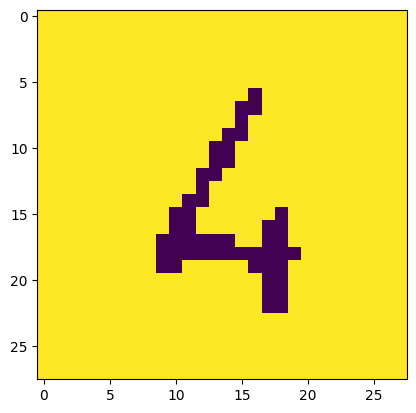

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
idx = 511
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

## Train-Test split

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

## Fit the model using svc and also to save the model using joblib

In [13]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

## calculate accuracy

In [14]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.2511415525114155


## prediction of image drawn in paint

In [15]:
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab

In [ ]:
model=joblib.load("model/digit_recognizer")
images_folder="output/"

while True:
    img=ImageGrab.grab(bbox=(60,170,400,500))

    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
    #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
    rows,cols=roi.shape
   
    X = []
   
    ## Add pixel one by one into data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
           
    predictions  =model.predict([X])
    print("Prediction:",predictions[0])
    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
   
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
        break
cv2.destroyAllWindows()

C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 9


C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 1


C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 2


C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\kkite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0
